In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy.optimize import curve_fit

In [2]:
def generating_function(t, par):
    return par[0] + par[1]*t + par[2]*np.sin(par[4]*t) + par[3]*np.cos(par[4]*t)
        
def fit_function(t, a, b, c, d, e):
    return a + b*t + c*np.sin(e*t) + d*np.cos(e*t)

def fit_function2(t, a, b, c, d, e):
    return a + b*t + c*np.sin(d*t + e)

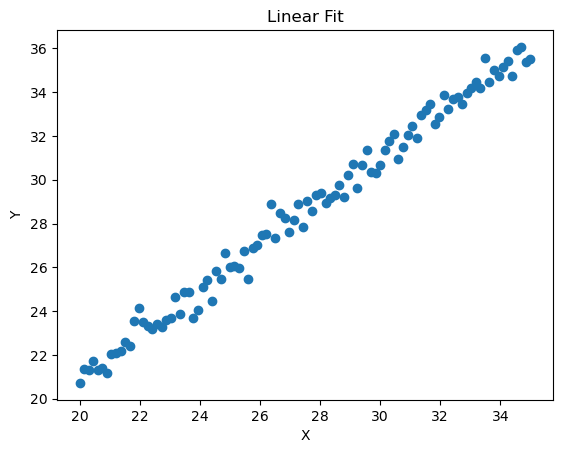

In [3]:
n = 100
par = [0.0, 1.0, 1.0, 1.0, 0.0]
x = np.linspace(20,35,n)
y = []

for i in range(0,n):
    r = random.gauss(0.0,0.5)
    y.append(generating_function(x[i],par)+r)


fig, ax = plt.subplots()
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Linear Fit')
ax.plot(x,y,'o')

Fit params:  [ 0.52027725  1.01668551 -0.03468291  0.09400023  0.84915207]
Covariance Matrix:  [[ 1.18746608e-01 -4.23926998e-03  3.64580487e-02  3.76991884e-03
   1.32906733e-02]
 [-4.23926998e-03  1.54447500e-04 -1.35923837e-03 -1.50143686e-04
  -4.97711584e-04]
 [ 3.64580487e-02 -1.35923837e-03  1.69443708e-01  6.10087752e-02
   6.35959873e-02]
 [ 3.76991884e-03 -1.50143686e-04  6.10087752e-02  2.83532319e-02
   2.36293128e-02]
 [ 1.32906733e-02 -4.97711584e-04  6.35959873e-02  2.36293128e-02
   2.45497203e-02]]
Errors in Fit params:  [0.3445963  0.01242769 0.41163541 0.16838418 0.1566835 ]
Fit 1: 22.598262235600366


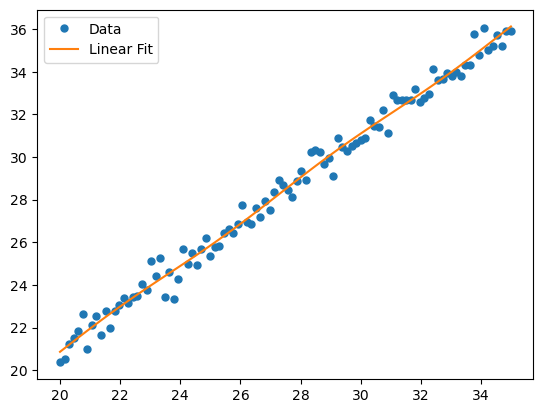

In [57]:
fit_params, covariance_matrix = curve_fit(fit_function, x, y)
fit_line = fit_function(x, *fit_params)
error_fit_params = np.sqrt(np.diag(covariance_matrix))

print("Fit params: ",fit_params)
print("Covariance Matrix: ",covariance_matrix)
print("Errors in Fit params: ",error_fit_params)

# Calculate chi-squared
residuals = y - fit_line
chi2 = np.sum(residuals ** 2)
print(f"Fit 1: {chi2}\n")

fig, ax = plt.subplots()
ax.plot(x, y, 'o', markersize=5, label='Data')
ax.plot(x, fit_line, '-', label='Linear Fit')
ax.legend()
plt.show()

Fit params:  [ 0.52027896  1.01668545 -0.1001941   0.84914915  5.06603459]
Covariance Matrix:  [[ 1.18756749e-01 -4.23963880e-03  9.06565690e-03  1.33063364e-02
  -3.54885847e-01]
 [-4.23963880e-03  1.54460919e-04 -3.28987730e-04 -4.98266166e-04
   1.32630912e-02]
 [ 9.06565690e-03 -3.28987730e-04  5.63400781e-03 -1.84288862e-04
   6.49210971e-03]
 [ 1.33063364e-02 -4.98266166e-04 -1.84288862e-04  2.45488949e-02
  -6.77085274e-01]
 [-3.54885847e-01  1.32630912e-02  6.49210971e-03 -6.77085274e-01
   1.91404801e+01]]
Errors in Fit params:  [0.34461101 0.01242823 0.07506003 0.15668087 4.37498344]
Fit 1: 22.598262243885063


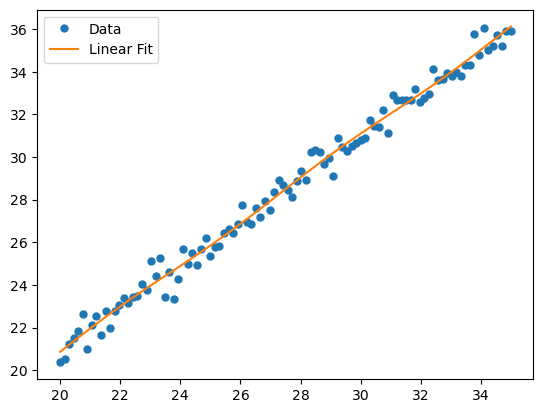

In [58]:
fit_params2, covariance_matrix2 = curve_fit(fit_function2, x, y)
fit_line2 = fit_function2(x, *fit_params2)
error_fit_params2 = np.sqrt(np.diag(covariance_matrix2))

print("Fit params: ",fit_params2)
print("Covariance Matrix: ",covariance_matrix2)
print("Errors in Fit params: ",error_fit_params2)

# Calculate chi-squared
residuals2 = y - fit_line2
chi2_2 = np.sum(residuals2 ** 2)
print(f"Fit 1: {chi2_2}\n")

fig, ax = plt.subplots()
ax.plot(x, y, 'o', markersize=5, label='Data')
ax.plot(x, fit_line2, '-', label='Linear Fit')
ax.legend()
plt.show()